In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [9]:
# Read SNODAS data for into a DataFrame
df = pd.read_csv('/home/cdalden/summa_setup/analysis/cuahsi_climo.txt', 
                 delim_whitespace=True, 
                 names=['Date', 'snow_depth'], 
                 usecols=['Date', 'snow_depth'])

# Drop the first row
df = df.drop(0)

# Reset the index
df = df.reset_index(drop=True)
df.set_index('Date', inplace=True)

/tmp/ipykernel_28351/2069268443.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/home/cdalden/summa_setup/analysis/cuahsi_climo.txt',


In [40]:
# Open the dataset and convert to DataFrame
summa_ds = xr.open_dataset("/home/cdalden/summa_setup/model/output/output_paradise_21Nov2024_timestep.nc")
summa_df = summa_ds['scalarSnowDepth'].to_dataframe() * 1000
summa_df = summa_df.reset_index()

# Convert 'time' column to datetime format and remove timezone information
summa_df['time'] = pd.to_datetime(summa_df['time']).dt.tz_localize(None)

# Set 'time' as the index
summa_df.set_index('time', inplace=True)

In [37]:
snotel = pd.read_csv('/home/cdalden/summa_setup/model/snotel_csvs/paradise_WY25.txt')

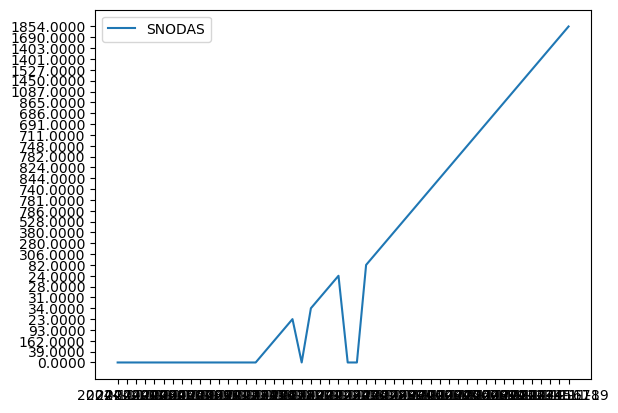

In [43]:
# Plotting
fig, ax = plt.subplots()
ax.plot(df.index, df['snow_depth'], label='SNODAS')
# ax.plot(summa_df.index, summa_df['scalarSnowDepth'], label='SUMMA')
# ax.plot(snotel.index, snotel['snow_depth'], label='SNOTEL')
ax.legend()
plt.show()

In [44]:
df.snow_depth.plot()

TypeError: no numeric data to plot